# Classification model using Logistic Regression

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

### 2. Upload RNA data

In [2]:
path ='C:/Users/sandr/Documents/ART_project/GNN model/Data/PPT-Ohmnet/mRCC_big_pool/Second big pool/mrcc_protein_matrix_24_genes_12_nodes.csv'
data = pd.read_csv(path)
data.head(5)

,Unnamed: 0,BAP1,EPAS1,MTOR,NF2,PIK3CA,PTEN,PTGS2,RNF139,SETD2,TP53,TSC1,VHL,Y
0,0,33.677294,37.95811,33.01718,33.96080,32.42544,36.73944,31.08504,32.46554,32.58565,33.83518,32.93402,32.30615,1
1,1,32.643149,38.83281,33.17883,33.69899,33.21465,37.13114,30.16993,32.27190,33.19915,34.44810,33.16630,32.19988,1
2,2,32.368866,37.19345,34.06093,34.07472,32.46705,37.91878,30.76766,32.55514,32.84628,35.41980,33.63282,31.49147,1
3,3,31.895400,39.46713,33.50445,33.14612,33.87549,37.77827,30.54053,33.19823,33.68316,34.18862,32.88250,32.11538,0
4,4,33.968348,38.49884,34.22502,32.58079,34.24976,37.99008,30.95478,30.89813,34.63036,34.91241,33.44515,33.33646,1


In [3]:
X = data.iloc[:,1:13  ] 
Y = []
for i in range (len(data)):
    if data.Y[i]==0: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    else:
        Y.append(1)# If PFS is over 3 months, I will consider it as Responder (R)
print(X)
print('Numero de pacientes: ',len(Y))

          BAP1     EPAS1      MTOR       NF2    PIK3CA      PTEN     PTGS2  \
0    33.677294  37.95811  33.01718  33.96080  32.42544  36.73944  31.08504   
1    32.643149  38.83281  33.17883  33.69899  33.21465  37.13114  30.16993   
2    32.368866  37.19345  34.06093  34.07472  32.46705  37.91878  30.76766   
3    31.895400  39.46713  33.50445  33.14612  33.87549  37.77827  30.54053   
4    33.968348  38.49884  34.22502  32.58079  34.24976  37.99008  30.95478   
..         ...       ...       ...       ...       ...       ...       ...   
176  33.843872  39.13826  33.84510  33.58214  32.89218  37.99666  30.11854   
177  32.519967  35.86338  32.98942  33.10420  33.35177  34.65038  31.17902   
178  33.115209  37.91340  34.30048  33.80118  32.93922  36.77314  33.02287   
179  32.895151  37.96870  32.81197  33.51366  32.59420  36.08937  31.14709   
180  33.404526  38.75226  33.43997  33.67890  32.98728  36.87734  34.94678   

       RNF139     SETD2      TP53      TSC1       VHL  
0    32

### 3. Train-Test dataset split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=125, stratify=Y)

print('Training set size:', len(X_train))
print('Target column size of the training set:', len(y_train))
print('Test set size:', len(X_test))
print('Target column size of the test set:', len(y_test))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


### 4. Select the parameters of the model and fit it

In [5]:
param_grid = {'C': [1,2,5,7,10],
            'solver': ['newton-cg','liblinear'], 
            'max_iter':[25,50,100,200,500,1000],
            'random_state':[125]}

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
clf.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 5, 7, 10],
                         'max_iter': [25, 50, 100, 200, 500, 1000],
                         'random_state': [125],
                         'solver': ['newton-cg', 'liblinear']})

In [6]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
# Fit the model with the best parameters
model.fit(X_train , y_train)

Best estimate of parameters according to GridSearchCV:


LogisticRegression(C=1, max_iter=25, random_state=125, solver='newton-cg')

In [7]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.46551724137931033


### 5. Prediction

In [8]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(X_train)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(y_train),1) :
    if (yhatTrain[i] == y_train[i]):
        contTrain = contTrain + 1

In [9]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(X_test)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(y_test),1) :
    if (yhatTest[i] == y_test[i]):
        contTest = contTest + 1

### 6. Results

In [10]:
print('Final accuracy on the training dataset: ' + str(contTrain/len(y_train)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(y_test)))

Final accuracy on the training dataset: 0.6180555555555556
Final accuracy on the testing dataset: 0.5135135135135135


In [11]:
from sklearn.metrics import classification_report,confusion_matrix
print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(y_train,yhatTrain))
print('Input data:  ' + str(np.array(y_train)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[35 33]
 [22 54]]
Input data:  [1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1
 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1]
Prediction:        [1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0
 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0
 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1]


In [12]:
print(classification_report(y_train,yhatTrain))

              precision    recall  f1-score   support

           0       0.61      0.51      0.56        68
           1       0.62      0.71      0.66        76

    accuracy                           0.62       144
   macro avg       0.62      0.61      0.61       144
weighted avg       0.62      0.62      0.61       144



In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, yhatTest)
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix)
print('Input data:  ' + str(np.array(y_test)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[ 7 10]
 [ 8 12]]
Input data:  [0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0]
Prediction:        [1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0]


In [14]:
print(classification_report(y_test, yhatTest))

              precision    recall  f1-score   support

           0       0.47      0.41      0.44        17
           1       0.55      0.60      0.57        20

    accuracy                           0.51        37
   macro avg       0.51      0.51      0.50        37
weighted avg       0.51      0.51      0.51        37



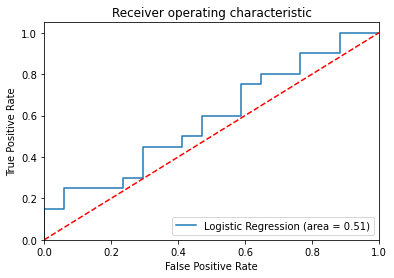

In [15]:
# En esta figrura se puede ver la proporción de falsos positivos con verdaderos positivos en el set de prueba
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()